In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

# creating Graphs using NetworkX:

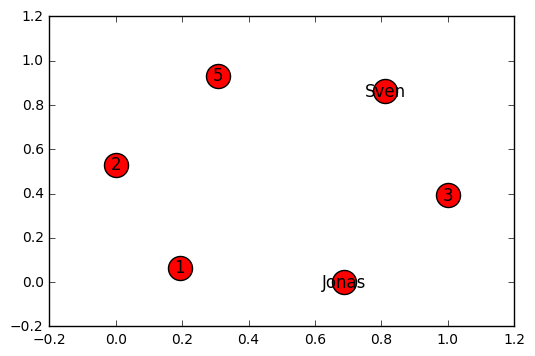

In [4]:
# Undirected Graph:
G = nx.Graph()
# create nodes:
List_of_nodes = [1, 2, 3, 5, "Jonas", "Sven"]
G.add_nodes_from(List_of_nodes)
nx.draw_networkx(G)
plt.show()

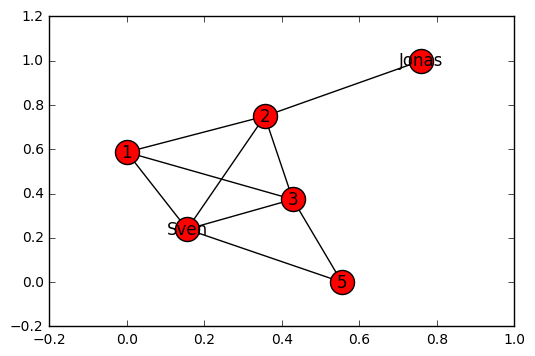

In [6]:
# create edges:
List_of_edges = [(1,2), (2,"Jonas"), (1,3), (3,5), (2,3), ("Sven",1), ("Sven",2), ("Sven",3), ("Sven",5)]
G.add_edges_from(List_of_edges)
nx.draw_networkx(G)
plt.show()

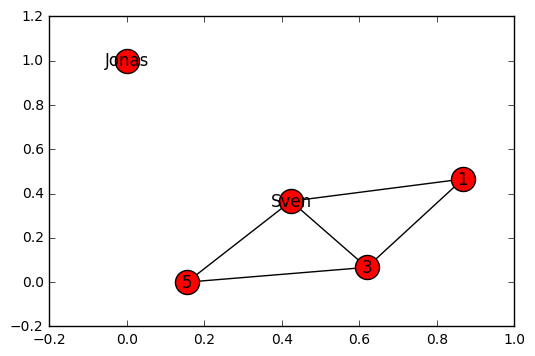

In [7]:
# remove nodes:
G.remove_node(2)
nx.draw_networkx(G)
plt.show()

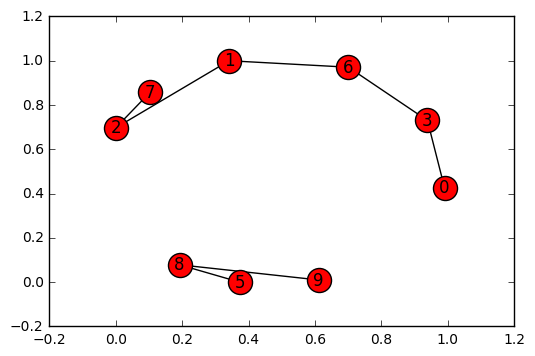

number of edges in H: 9
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[(0, 3), (1, 2), (1, 6), (2, 2), (2, 7), (3, 6), (5, 8), (5, 5), (8, 9)]


In [12]:
# create random graph:
H = nx.Graph()
# Graph can be created by only adding edges:
for i in range(0, 10):
    H.add_edge(random.randrange(0,10,1), random.randrange(0,10,1))
nx.draw_networkx(H)
plt.show()
print("number of edges in H: %d" % nx.number_of_edges(H))
print(H.nodes())
print(H.edges())

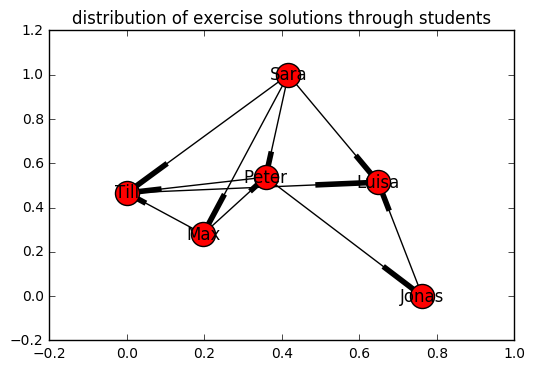

In [13]:
# Directed Graph:
I = nx.DiGraph()
List_of_edges = [("Max","Peter"), ("Peter","Jonas"), ("Max","Till"), ("Till","Luisa"), ("Jonas","Luisa"), 
                 ("Peter","Till"), ("Sara","Max"), ("Sara","Peter"), ("Sara","Till"), ("Sara","Luisa")]
I.add_edges_from(List_of_edges)
nx.draw_networkx(I)
plt.title("distribution of exercise solutions through students")
plt.show()

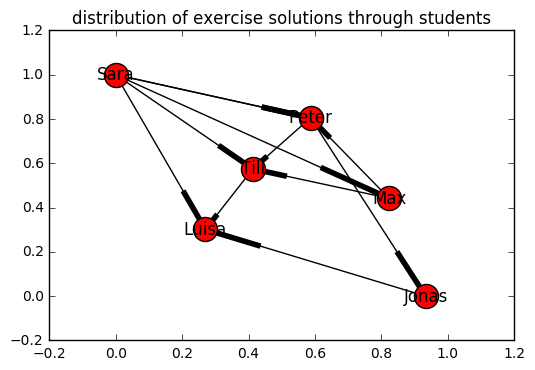

[('Max', 'Till'), ('Max', 'Peter'), ('Sara', 'Max'), ('Sara', 'Peter'), ('Sara', 'Peter'), ('Sara', 'Luisa'), ('Sara', 'Till'), ('Till', 'Luisa'), ('Jonas', 'Luisa'), ('Peter', 'Till'), ('Peter', 'Jonas')]
[('Max', 'Till'), ('Max', 'Peter'), ('Sara', 'Max'), ('Sara', 'Peter'), ('Sara', 'Luisa'), ('Sara', 'Till'), ('Till', 'Luisa'), ('Jonas', 'Luisa'), ('Peter', 'Till'), ('Peter', 'Jonas')]


In [14]:
# MultiDigraph:
J = nx.MultiDiGraph()
J.add_edges_from(I.edges())
J.add_edge("Sara", "Peter")
I.add_edge("Sara", "Peter")
nx.draw_networkx(J)
plt.title("distribution of exercise solutions through students")
plt.show()
print(J.edges())
print(I.edges())

# analyzing Networks using NetworkX:

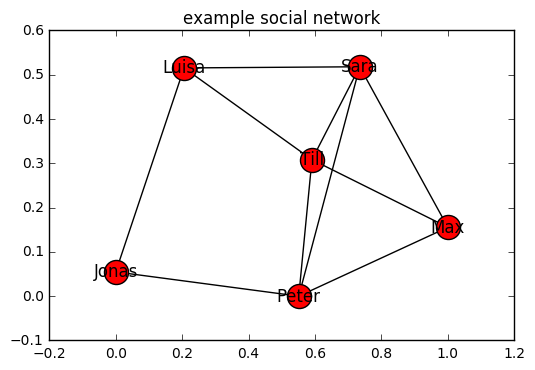

number of nodes in I: 6
number of edges in I: 10
Sara is friends with:
['Max', 'Peter', 'Luisa', 'Till']
degree of nodes in I:
{'Max': 3, 'Sara': 4, 'Till': 4, 'Luisa': 3, 'Jonas': 2, 'Peter': 4}
Is I connected? True
Is I directed? False


In [16]:
I = I.to_undirected()
nx.draw_networkx(I)
plt.title("example social network")
plt.show()
# analyze graph I
print("number of nodes in I: %d" % I.number_of_nodes())
print("number of edges in I: %d" % I.number_of_edges())
print("Sara is friends with:") 
print(I.neighbors("Sara"))
print("degree of nodes in I:")
print(I.degree())
print("Is I connected? %s" % nx.is_connected(I))
print("Is I directed? %s" % nx.is_directed(I))

In [17]:
# adajacency list of I:
print(I.nodes())
I.adjacency_list()

['Max', 'Sara', 'Till', 'Luisa', 'Jonas', 'Peter']


[['Till', 'Peter', 'Sara'],
 ['Max', 'Peter', 'Luisa', 'Till'],
 ['Max', 'Sara', 'Luisa', 'Peter'],
 ['Till', 'Sara', 'Jonas'],
 ['Luisa', 'Peter'],
 ['Max', 'Sara', 'Jonas', 'Till']]

# Network algorithm on example data:

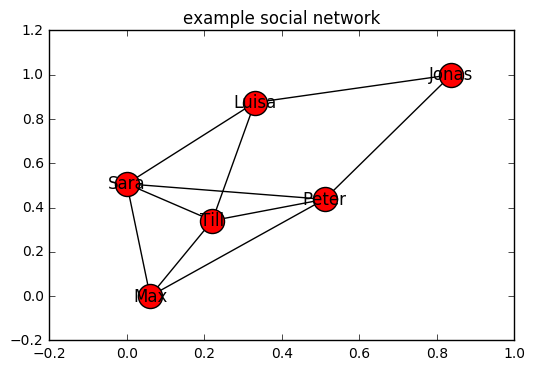

,Betweenness,Closeness,Degree
Jonas,0.033333,0.625000,0.4
Luisa,0.100000,0.714286,0.6
Max,0.000000,0.714286,0.6
Peter,0.200000,0.833333,0.8
Sara,0.083333,0.833333,0.8
Till,0.083333,0.833333,0.8


In [18]:
# metrics on example social network:
b = nx.betweenness_centrality(I, k = None, normalized = True, endpoints = False, seed = None)
c = nx.closeness_centrality(I)
d = nx.degree_centrality(I)
d = {"Betweenness": b, "Degree": d, "Closeness": c}
nx.draw_networkx(I)
plt.title("example social network")
plt.show()
pd.DataFrame(d)

# an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand

/home/sven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/home/sven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/home/sven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


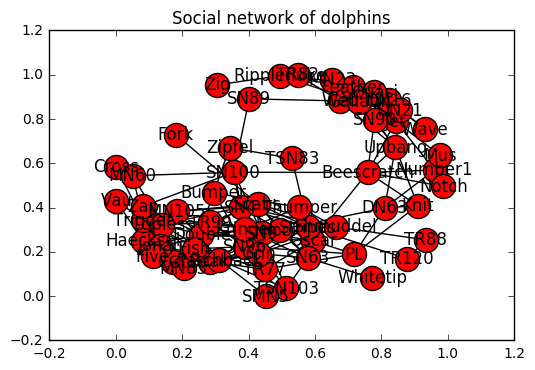

,Betweenness top,Closeness top,Degree top
1,SN100,SN100,Grin
2,Beescratch,SN9,SN4
3,SN9,SN4,Topless
4,SN4,Kringel,Scabs
5,DN63,Grin,Trigger
6,Jet,Beescratch,Kringel
7,Kringel,Scabs,Patchback
8,Upbang,DN63,Web
9,Trigger,Oscar,Jet
10,Web,Double,SN9


In [20]:
###
# example data:
# D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, 
# Behavioral Ecology and Sociobiology 54, 396-405 (2003)
###
K = nx.read_gml("dolphins.gml", relabel = True)
b = nx.betweenness_centrality(K)
c = nx.closeness_centrality(K)
d = nx.degree_centrality(K)
dic = {"Betweenness": b, "Degree": d, "Closeness": c}
data = pd.DataFrame(dic)
# determine top 10 dolphins for each measure:
betweenness_top = data.sort_index(by = "Betweenness", ascending = False)[0:10].index
closeness_top = data.sort_index(by = "Closeness", ascending = False)[0:10].index
degree_top = data.sort_index(by = "Degree", ascending = False)[0:10].index
dic_top = {"Betweenness top": betweenness_top, "Closeness top": closeness_top, "Degree top": degree_top}

nx.draw_networkx(K)
plt.title("Social network of dolphins")
plt.show()
pd.DataFrame(dic_top, index = range(1,11))